In [10]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

Load dataset

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

Convert to categorical

In [9]:
x_train_flatten = x_train.reshape(x_train.shape[0], -1)
y_train_flatten = y_train.reshape(x_train.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)
y_test_flatten = y_test.reshape(x_test.shape[0], -1)

y_train_categorical = np_utils.to_categorical(y_train_flatten, 10)
y_test_categorical = np_utils.to_categorical(y_test_flatten, 10)

Sequential model

In [12]:
model_temp = Sequential()

# Input Layer
model_temp.add(layers.Dense(128, input_shape=(x_train.shape[1] * x_train.shape[2],)))
model_temp.add(layers.Activation('relu'))

# Hidden Layer
model_temp.add(layers.Dense(128))
model_temp.add(layers.Activation('relu'))

# Output Layer
model_temp.add(layers.Dense(10))
model_temp.add(layers.Activation('softmax'))

Model summary

In [13]:
model_temp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trai

Compile model

In [14]:
model_temp.compile(optimizer = SGD(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

Train model

In [15]:
history = model_temp.fit(x_train_flatten, y_train_categorical, batch_size=128,
                         epochs=20, verbose=1, validation_split =0.2)

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 1.4661 - accuracy: 0.6259 - val_loss: 0.7311 - val_accuracy: 0.8462
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.5829 - accuracy: 0.8578 - val_loss: 0.4425 - val_accuracy: 0.8892
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.4324 - accuracy: 0.8838 - val_loss: 0.3692 - val_accuracy: 0.9015
Epoch 4/20
375/375 [==============================] - 2s 7ms/step - loss: 0.3762 - accuracy: 0.8956 - val_loss: 0.3332 - val_accuracy: 0.9066
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3444 - accuracy: 0.9033 - val_loss: 0.3098 - val_accuracy: 0.9121
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3220 - accuracy: 0.9096 - val_loss: 0.2930 - val_accuracy: 0.9162
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3049 - accuracy: 0.9135 - val_loss: 0.2787 - val_accuracy: 0.9221
Epoch 

Plot accuracy

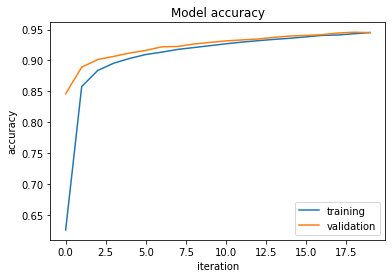

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

Plot loss

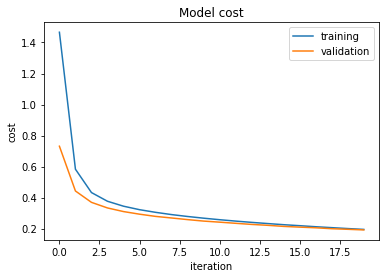

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model cost')
plt.ylabel('cost')
plt.xlabel('iteration')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()